<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setting-up-libraries-and-loading-data" data-toc-modified-id="Setting-up-libraries-and-loading-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setting up libraries and loading data</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Features-renaming" data-toc-modified-id="Features-renaming-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Features renaming</a></span></li><li><span><a href="#Duplicates" data-toc-modified-id="Duplicates-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Duplicates</a></span></li><li><span><a href="#Outliers-and-erroneous-data" data-toc-modified-id="Outliers-and-erroneous-data-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Outliers and erroneous data</a></span><ul class="toc-item"><li><span><a href="#Quantitative-features" data-toc-modified-id="Quantitative-features-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Quantitative features</a></span></li><li><span><a href="#Categorial-features" data-toc-modified-id="Categorial-features-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Categorial features</a></span></li></ul></li><li><span><a href="#Gaps" data-toc-modified-id="Gaps-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Gaps</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Data-formats" data-toc-modified-id="Data-formats-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Data formats</a></span></li></ul></li><li><span><a href="#Machine-learning" data-toc-modified-id="Machine-learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Machine learning</a></span><ul class="toc-item"><li><span><a href="#Data-preparation-for-machine-learning-models" data-toc-modified-id="Data-preparation-for-machine-learning-models-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data preparation for machine learning models</a></span><ul class="toc-item"><li><span><a href="#Data-preparation-for-linear-model-(Ridge)" data-toc-modified-id="Data-preparation-for-linear-model-(Ridge)-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Data preparation for linear model (Ridge)</a></span></li><li><span><a href="#LightGBM-data-preparation" data-toc-modified-id="LightGBM-data-preparation-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>LightGBM data preparation</a></span></li><li><span><a href="#CatBoost-data-preparation" data-toc-modified-id="CatBoost-data-preparation-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>CatBoost data preparation</a></span></li><li><span><a href="#Task-metrics" data-toc-modified-id="Task-metrics-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Task metrics</a></span></li></ul></li><li><span><a href="#Ridge" data-toc-modified-id="Ridge-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Ridge</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>CatBoost</a></span></li></ul></li><li><span><a href="#Model-comparison" data-toc-modified-id="Model-comparison-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model comparison</a></span></li></ul></div>

# Used cars price prediction

This notebook uses prettified Kaggle [used cars dataset](https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices). Dataset contains car ads from eBay-Kleinanzeigen.

The task is to predict car price with minimum error and minimum model working time. Task metric is RMSE.

## Setting up libraries and loading data

In [1]:
!pip install -q --user --no-deps matplotlib==3.4.0
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from datetime import datetime
import warnings
warnings.simplefilter("ignore")

In [2]:
plt.style.use('fivethirtyeight')

In [ ]:
plt_params = {'axes.titlesize': '16',
              'axes.labelsize': '14',
              'axes.spines.left': True,
              'axes.spines.bottom': True,
              'axes.spines.right': False,
              'axes.spines.top': False,
              'xtick.labelsize': '12',
              'ytick.labelsize': '12',
              'legend.fontsize': '12',
              'lines.linewidth': '2.0'}

plt.rcParams.update(plt_params)

In [4]:
!pip install -q --user lightgbm
import lightgbm as lgb

In [5]:
!pip install -q --user catboost
from catboost import CatBoostRegressor, Pool

Fix catboost compatibility issues:

In [6]:
!pip install -q -U ipywidgets==7.6.5  

In [7]:
!pip install -q --user scikit-learn==1.2.2
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.utils import shuffle

In [8]:
!pip install -q --user category-encoders
from category_encoders.target_encoder import TargetEncoder

In [9]:
np.random.seed(42)

In [10]:
df = pd.read_csv(
    'https://code.s3.yandex.net/datasets/autos.csv',
    parse_dates=['LastSeen', 'DateCreated', 'DateCrawled']
)

## Data preprocessing

General dataset description:

In [11]:
def describe_df(df):
    display(df.head())
    print('-----------------------------------------------------------------------------------------------')
    display(df.info())
    print('-----------------------------------------------------------------------------------------------')
    display(df.describe())
    print('-----------------------------------------------------------------------------------------------')
    display(f'Number of duplicates: {df.duplicated().sum()}')

In [12]:
describe_df(df)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31,0,60437,2016-04-06 10:17:21


-----------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        354369 non-null  datetime64[ns]
 1   Price              354369 non-null  int64         
 2   VehicleType        316879 non-null  object        
 3   RegistrationYear   354369 non-null  int64         
 4   Gearbox            334536 non-null  object        
 5   Power              354369 non-null  int64         
 6   Model              334664 non-null  object        
 7   Kilometer          354369 non-null  int64         
 8   RegistrationMonth  354369 non-null  int64         
 9   FuelType           321474 non-null  object        
 10  Brand              354369 non-null  object        
 11  Repaired           283215 non-null  object        
 12  Date

None

-----------------------------------------------------------------------------------------------


,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


-----------------------------------------------------------------------------------------------


'Number of duplicates: 4'

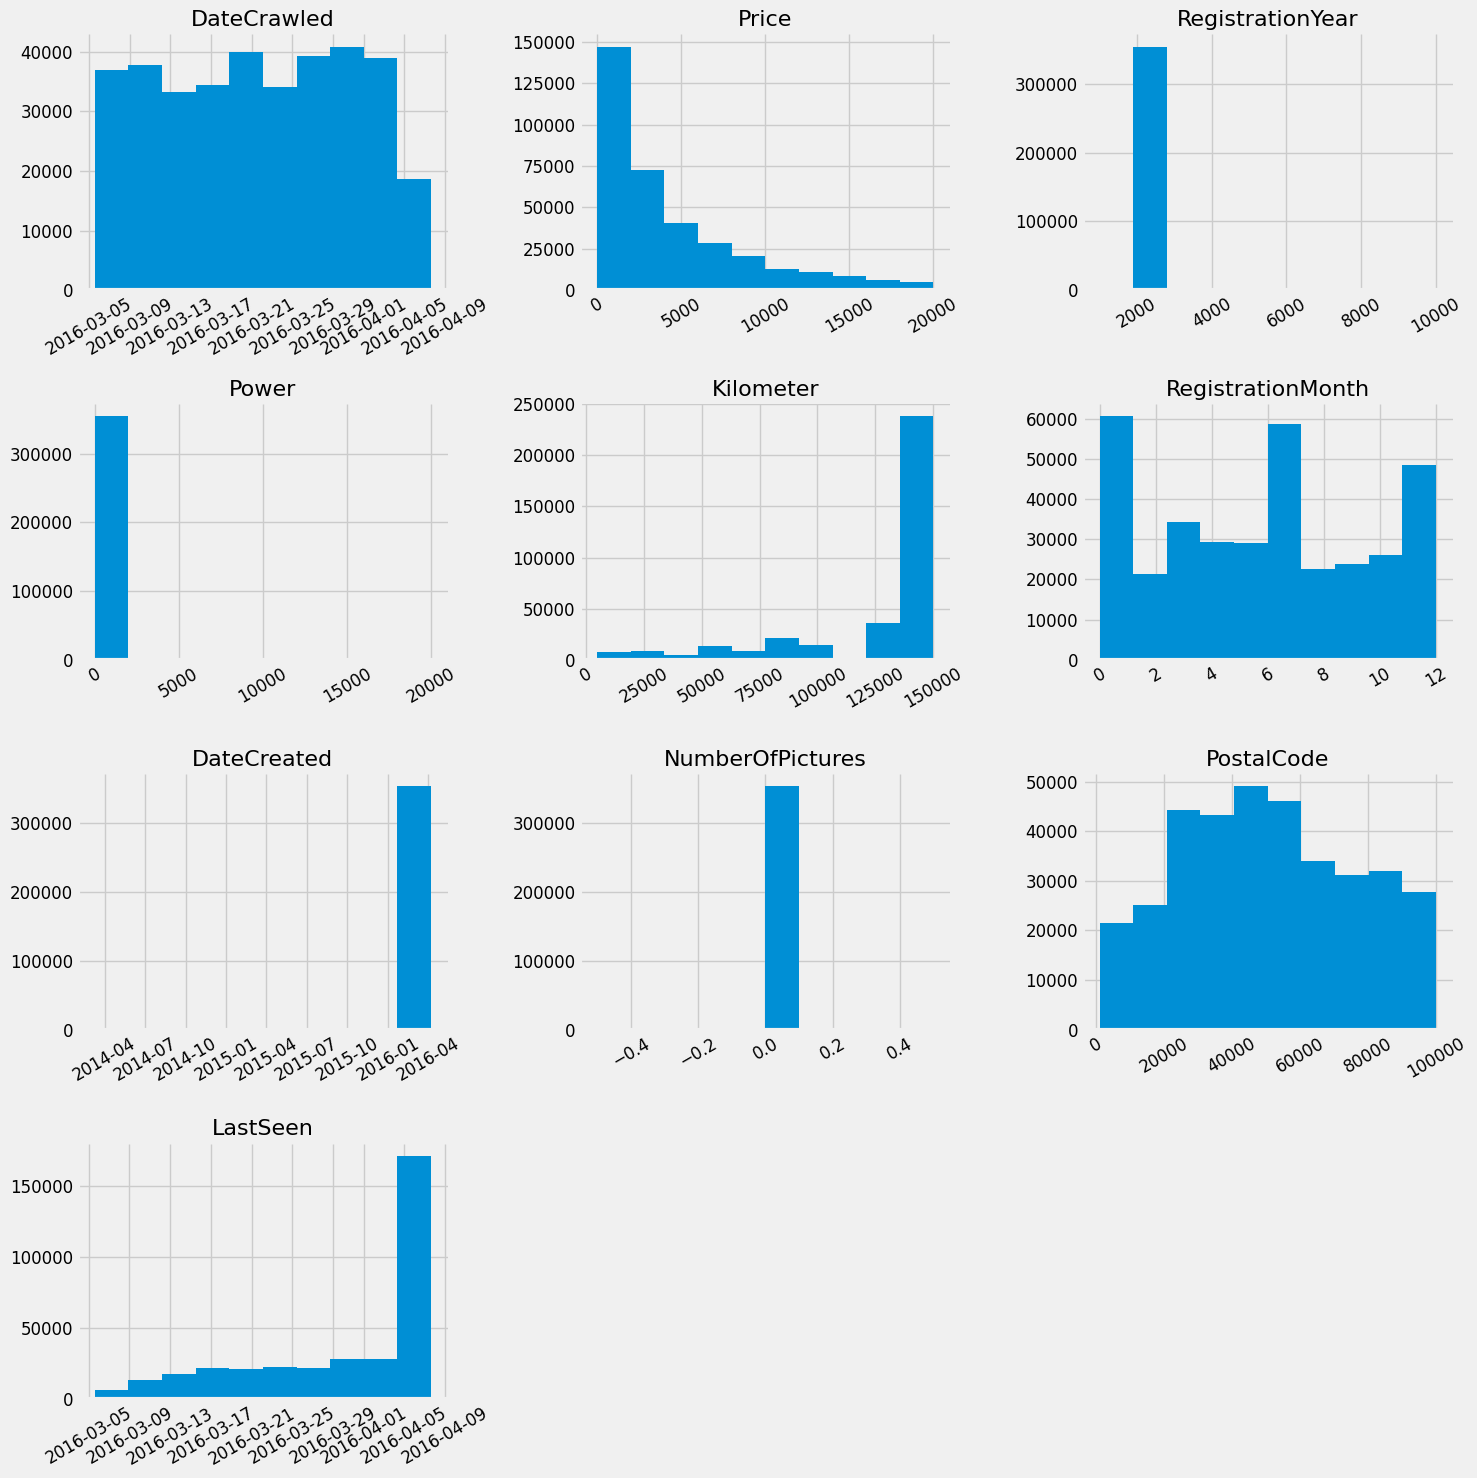

In [13]:
df.hist(figsize=(15,15), xrot=30)
plt.tight_layout()
plt.show()

There are 354368 objects and 16 features in the dataset. Three features have a date format, 7 features are quantitative and 6 other are categorical. There are gaps and illogical values in a number of columns (for example, `RegistrationYear` = 400). There are 4 complete duplicates in the dataset. According to the histograms, there are also outliers in some of the columns (for example, in the `Power` feature).

The task is to select the best machine learning model. To get the data ready, the following will will be completed: 
* Columns renaming
* Duplicates and outliers removal
* Imputation
* Feature engineering
* Converting the data into appropriate formats

### Features renaming

Rename the columns according to snake_case for convenience:

In [14]:
def rename_column(col_name):
    split = re.findall(r'[A-Z][^A-Z]*', col_name)
    return '_'.join(map(lambda x: x.lower(), split))

In [15]:
# rename and check if renamed correctly
df.rename(columns={col: rename_column(col) for col in df.columns}, inplace=True)
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen'],
      dtype='object')

### Duplicates

Dropping explicit duplicates:

In [16]:
df.drop_duplicates(inplace=True)

There may be implicit duplicates in the data as well, e.g. the same ads published at different times. Since **last_seen** is almost a unique user ID, and **brand**, **price**, and **registration_year** all point almost unambiguously to the same car, we'll remove the values that match those criteria.

In [17]:
# implicit duplicates count
df[['price', 'last_seen', 'registration_year', 'brand']].duplicated().sum()

204

In [18]:
# dropping implicit duplicates
index_to_drop = df[df[['price', 'last_seen', 'registration_year', 'brand']].duplicated()].index
df.drop(index_to_drop, inplace=True)

### Outliers and erroneous data

Quantitative and categorical features will be investigated separately.

#### Quantitative features

In [19]:
df.select_dtypes('int64').columns

Index(['price', 'registration_year', 'power', 'kilometer',
       'registration_month', 'number_of_pictures', 'postal_code'],
      dtype='object')

According to histograms and statistical description, following features definitely have outliers: **registration_year, power, date_created, number_of_pictures**.  

###### **registration_year**

Some very old cars are present:

In [20]:
len(df[df['registration_year'] < 1950])

246

All observations with date > 2016 seem erroneous as well (the dataset is from 2016):

In [21]:
df[df['registration_year'] > 2016]['registration_year'].value_counts().head()

2017    10441
2018     3958
9999       26
2019       25
5000       17
Name: registration_year, dtype: int64

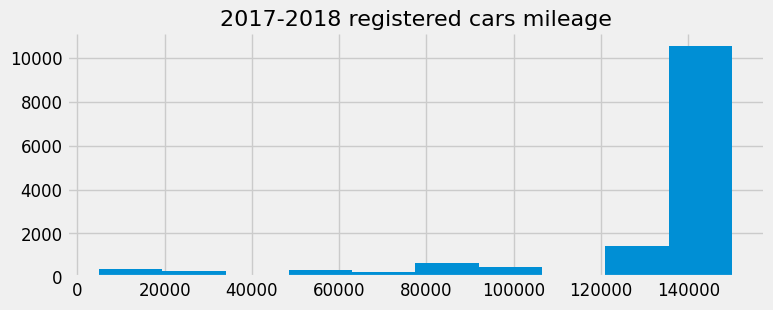

In [22]:
df[df['registration_year'].isin([2017, 2018])]['kilometer'].hist(figsize=(8,3))
plt.title('2017-2018 registered cars mileage')
plt.show()

Very big mileages for new cars. These observations should be deleted. 

If we take a closer look at the cars registered in 2010-2014, we will see that the price distribution is very different in comparison with that for 2015 and later registered cars. New cars should be expensive, which is true for 2010-2014. As 2015+ registered cars don't follow the same pattern, it's safer to remove all 'cheap' (price < 5000) cars with registration year 2015 and 2016.

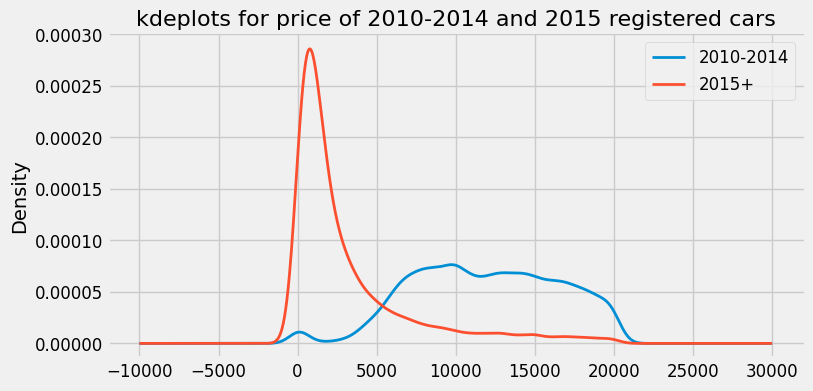

In [23]:
df[(df.registration_year > 2010) & (df.registration_year < 2015)]['price'].plot(kind='kde')
df[df.registration_year > 2014]['price'].plot(kind='kde', figsize=(8,4))
plt.title('kdeplots for price of 2010-2014 and 2015 registered cars')
plt.legend(('2010-2014', '2015+'))
plt.show()

In [24]:
# adding illogical and ambiguous values to drop list
index_to_drop = df[(df['registration_year'] > 2016) | (df['registration_year'] < 1950)].index
index_to_drop = index_to_drop.union(df[(df['registration_year'] > 2014) & (df['price'] < 5000)].index)
len(index_to_drop)

23583

###### **power**

Maximum car price in the dataset is 20000 euro. That means no supercars should be present and observations with horsepower > 500 should be removed.

In [25]:
df[(df['power'] > 500)].head()

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,date_created,number_of_pictures,postal_code,last_seen
1816,2016-03-22 20:52:00,3200,small,2004,manual,1398,corolla,5000,6,petrol,toyota,no,2016-03-22,0,22043,2016-03-22 21:43:26
2102,2016-03-21 11:55:22,0,sedan,1999,NaN,1799,vectra,150000,1,petrol,opel,yes,2016-03-21,0,1723,2016-04-04 04:49:06
3746,2016-03-21 14:48:31,0,NaN,2017,manual,750,NaN,150000,8,petrol,smart,no,2016-03-21,0,49356,2016-03-24 03:44:59
4060,2016-04-03 20:31:00,3100,sedan,2005,manual,953,colt,150000,4,gasoline,mitsubishi,no,2016-04-03,0,60326,2016-04-07 14:56:46
5328,2016-03-29 19:44:48,500,wagon,1999,manual,1001,astra,150000,7,petrol,opel,NaN,2016-03-29,0,33154,2016-04-06 05:44:36


Toyota Corolla or Opel Astra are unlikely to have more than 500 hp.

This feature also contains 40 thousand zero values. Perhaps the zeros serve as stubs while filling out the questionnaire when the amount of hp is unknown. Anyway, it's easier to delete such observations along with those where power < 20 (such cars are not very common).

In [26]:
df.power.value_counts().head()

0      40214
75     24010
60     15884
150    14581
101    13290
Name: power, dtype: int64

In [27]:
len(df[df.power <= 20])

40653

In [28]:
len(df[df.power > 500])

459

In [29]:
index_to_drop = index_to_drop.union(df[(df['power'] > 500) | (df['power'] <= 20)].index)

###### **date_created**

According to the histogram, almost all date values are from 2016. 2015 values are outliers and may be deleted.

In [30]:
# count of observations from 2015
len(df[df['date_created'] <= '2015-12-31'])

26

In [31]:
# adding to the drop list
index_to_drop = index_to_drop.union(df[df['date_created'] <= '2015-12-31'].index)

###### **number_of_pictures**

This feature only has 1 value for all observations and should be removed.

In [32]:
df['number_of_pictures'].value_counts()

0    354161
Name: number_of_pictures, dtype: int64

In [33]:
# dropping the feature
df.drop('number_of_pictures', axis=1, inplace=True)

###### **price, kilometer, registration_month, postal_code**

Statistical description of the remaining features:

In [34]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
display(df[['price', 'kilometer', 'registration_month', 'postal_code']].describe())
pd.set_option('display.float_format', lambda x: '%.2f' % x)

,price,kilometer,registration_month,postal_code
count,354161,354161,354161,354161
mean,4416,128213,6,50507
std,4514,37905,4,25784
min,0,5000,0,1067
25%,1050,125000,3,30165
50%,2700,150000,6,49406
75%,6400,150000,9,71083
max,20000,150000,12,99998


There are a lot of 150000 in the **kilometer** feature. Apparently, this is the maximum value that the site allows you to enter.

There are zeros in the **price** and **registration_month** columns.
Since **price** is the target variable, it's better to remove observations that match price < 100. Cars are unlikely to be this cheap, so it's very possible these are erroneuous values.   
**registration_month** will be left as is.

In [35]:
# number of ads with registration month == 0
len(df[df.registration_month == 0])

37344

In [36]:
# number of ads with price == 0
len(df[df.price == 0])

10767

In [37]:
index_to_drop = index_to_drop.union(df[df.price < 100].index)

#### Categorial features

In [38]:
df.select_dtypes('object').columns

Index(['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired'], dtype='object')

###### **vehicle_type**

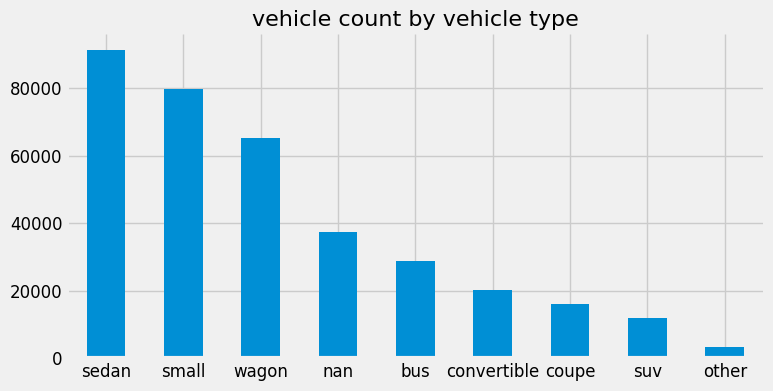

In [39]:
df.vehicle_type.value_counts(dropna=False).plot(kind='bar', rot=0, figsize=(8,4))
plt.title('vehicle count by vehicle type')
plt.show()

Looks ok.

###### **gearbox**

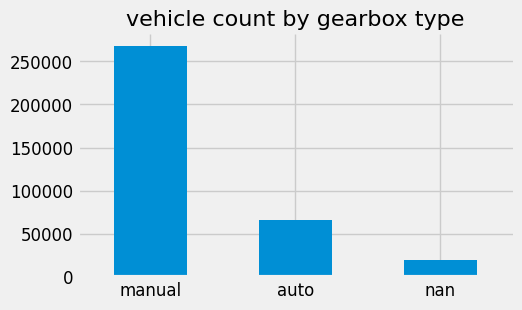

In [40]:
df.gearbox.value_counts(dropna=False).plot(kind='bar', rot=0, figsize=(5,3))
plt.title('vehicle count by gearbox type')
plt.show()

Looks ok.

###### **fuel_type**

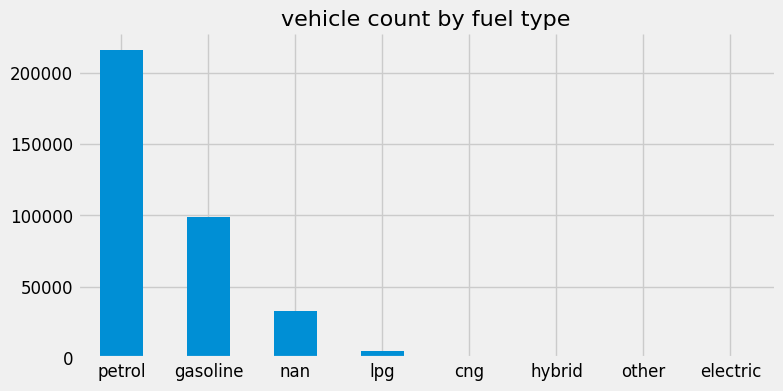

In [41]:
df.fuel_type.value_counts(dropna=False).plot(kind='bar', rot=0, figsize=(8,4))
plt.title('vehicle count by fuel type')
plt.show()

There seems to be a mistake in the dataset, as 'petrol' and 'gasoline' is the same fuel type. However, renaming gasoline to petrol leads to drop in metrics. Probably the most reasonable explanation is that 'gasoline' should actually be 'diesel' and there was a translation mistake. 

In [42]:
df['fuel_type'].where(df['fuel_type'] != 'gasoline', 'diesel', inplace=True)

In [43]:
df.fuel_type.value_counts().head(2)

petrol    216233
diesel     98651
Name: fuel_type, dtype: int64

###### **repaired**

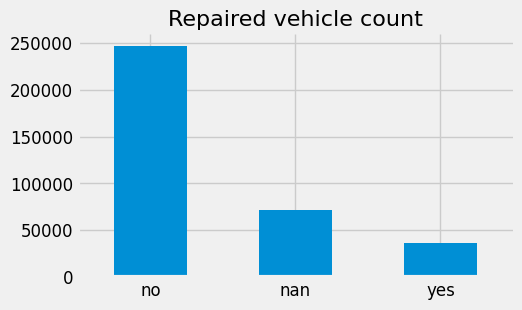

In [44]:
df.repaired.value_counts(dropna=False).plot(kind='bar', rot=0, figsize=(5,3))
plt.title('Repaired vehicle count')
plt.show()

Looks ok.

###### **brand**

In [45]:
brand_list = list(df.brand.unique())
brand_list.sort(key=lambda x: x[:2])
brand_list

['alfa_romeo',
 'audi',
 'bmw',
 'chevrolet',
 'chrysler',
 'citroen',
 'dacia',
 'daihatsu',
 'daewoo',
 'fiat',
 'ford',
 'honda',
 'hyundai',
 'jaguar',
 'jeep',
 'kia',
 'lancia',
 'land_rover',
 'lada',
 'mazda',
 'mercedes_benz',
 'mini',
 'mitsubishi',
 'nissan',
 'opel',
 'peugeot',
 'porsche',
 'renault',
 'rover',
 'saab',
 'seat',
 'skoda',
 'smart',
 'sonstige_autos',
 'subaru',
 'suzuki',
 'toyota',
 'trabant',
 'volkswagen',
 'volvo']

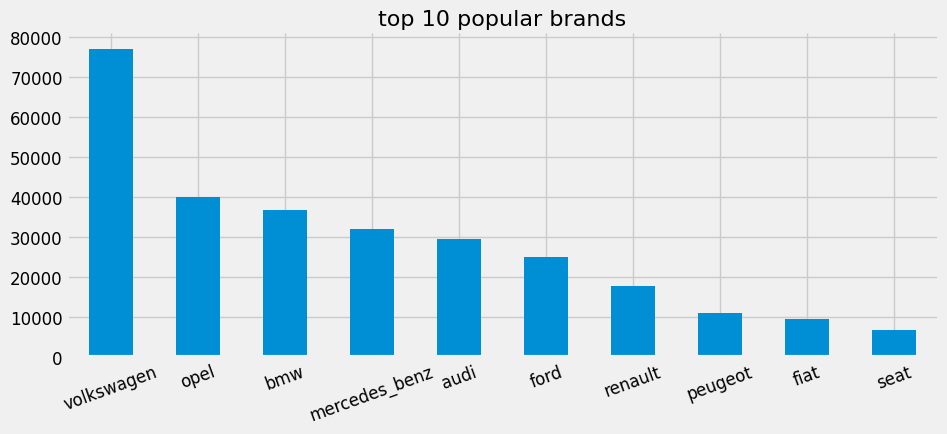

In [46]:
df.brand.value_counts(dropna=False).head(10).plot(kind='bar', rot=20, figsize=(10,4))
plt.title('top 10 popular brands')
plt.show()

There are no duplicates or errors, and the brand names are real.

###### **model**

In [47]:
model_list = list(filter(lambda x: x is not np.nan, list(df.model.unique())))
model_list.sort(key=lambda x: x[:2])
model_list

['100',
 '147',
 '145',
 '156',
 '159',
 '1_reihe',
 '1er',
 '200',
 '2_reihe',
 '300c',
 '3_reihe',
 '3er',
 '4_reihe',
 '500',
 '5_reihe',
 '5er',
 '601',
 '6_reihe',
 '6er',
 '7er',
 '80',
 '850',
 '90',
 '900',
 '9000',
 '911',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a8',
 'a_klasse',
 'accord',
 'agila',
 'almera',
 'alhambra',
 'altea',
 'amarok',
 'antara',
 'arosa',
 'astra',
 'auris',
 'avensis',
 'aveo',
 'aygo',
 'b_klasse',
 'b_max',
 'berlingo',
 'beetle',
 'boxster',
 'bora',
 'bravo',
 'c1',
 'c2',
 'c3',
 'c4',
 'c5',
 'c_max',
 'c_klasse',
 'c_reihe',
 'caddy',
 'carisma',
 'cayenne',
 'carnival',
 'calibra',
 'captiva',
 'cc',
 'ceed',
 'cherokee',
 'charade',
 'civic',
 'citigo',
 'clio',
 'clk',
 'cl',
 'clubman',
 'corsa',
 'combo',
 'cordoba',
 'colt',
 'cooper',
 'corolla',
 'crossfire',
 'cr_reihe',
 'croma',
 'cuore',
 'cx_reihe',
 'defender',
 'delta',
 'discovery',
 'doblo',
 'duster',
 'ducato',
 'e_klasse',
 'elefantino',
 'eos',
 'escort',
 'espace',
 

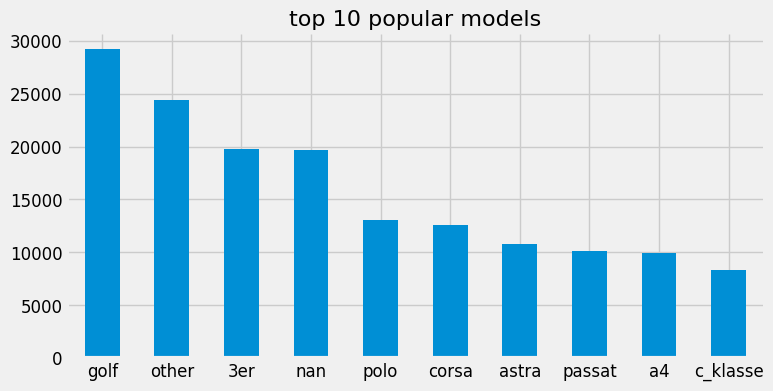

In [48]:
df.model.value_counts(dropna=False).head(10).plot(kind='bar', rot=0, figsize=(8,4))
plt.title('top 10 popular models')
plt.show()

The only mistake here is that there are two different versions of the range rover.

In [49]:
df.model.where(df['model'] != 'rangerover', 'range_rover', inplace=True)

---
All the features have been covered.   
Now all the observations from the `index_to_drop` list should be removed. A little less than 20% of the dataset is to be dropped, which is quite acceptable.

In [50]:
print(f'Following data share will be removed: {len(index_to_drop) / len(df):.2%}')

Following data share will be removed: 18.33%


In [51]:
df.drop(index_to_drop, inplace=True)

### Gaps

In [52]:
# number of gaps in features
df.isna().sum()

date_crawled              0
price                     0
vehicle_type           5459
registration_year         0
gearbox                4793
power                     0
model                 10174
kilometer                 0
registration_month        0
fuel_type             13043
brand                     0
repaired              40001
date_created              0
postal_code               0
last_seen                 0
dtype: int64

###### **vehicle_type, gearbox, fuel_type, repaired**

In these columns, simply fill in the gaps with a stub.

In [53]:
df[['vehicle_type', 'gearbox', 'fuel_type', 'repaired']].fillna('missing', inplace=True)

###### **model**

An general idea is to fill in the gaps in this column based on the kNN algorithm, but it takes a very long time. Therefore, we sort by brand, vehicle type and power and impute with an impromptu "nearest neighbor" using ffill. Then the data is shuffled.

In [54]:
df.model.isna().sum()

10174

In [55]:
df = df.sort_values(by=['brand', 'vehicle_type', 'power'])
df.fillna(method='ffill', inplace=True)

In [56]:
df = shuffle(df, random_state=42)

### Feature engineering

New features improving the quality of models can be derived from columns with dates. Following new features are proposed:
1. The age of the car at the time of posting the ad.
2. The period between the date of the ad and the date the user was last seen on the site (user activity). For example, if the user has not appeared for a long time, then he did not adjust the cost of the car, which may cause it to be overpriced.
3. Car age category.

###### Age

In [57]:
def replace_zeros(x):
    if x == 0:
        x = np.random.randint(1, 12)
    return x

In [58]:
real_month = df['registration_month'].apply(replace_zeros)

In [59]:
# adding a complete date of registration (day and sometimes month is randomly generated)
date_of_reg = pd.to_datetime({
    'year': df['registration_year'],
    'month': real_month,
    'day': [np.random.randint(1, 28) for i in range(len(df))]
})

In [60]:
# creating new feature - age of vehicle in days
df['age'] = df['date_created'] - date_of_reg
df['age'] = df['age'].dt.days
df.drop(df[df['age'] < 0].index, inplace=True)  # remove negative values from data

###### User activity

In [61]:
# creating new feature describing user activity
df['afk'] = df['last_seen'] - df['date_created']
df['afk'] = df['afk'].dt.days
df.drop(df[df['afk'] < 0].index, inplace=True)

###### Age category

In [62]:
age_type = {
    'registration_year < 1985': 'retro',
    'registration_year < 2000 & registration_year >= 1985': '85-00',
    'registration_year < 2005 & registration_year >= 2000': '00-05',
    'registration_year < 2010 & registration_year >= 2005': '05-10',
    'registration_year < 2015 & registration_year >= 2010': '10-15',
    'registration_year >= 2015': '>=15'
}

In [63]:
# adding new feature - car age category
# this improves LinearRegression score A LOT
for condition, category in age_type.items():
    print('Creating category:', category)
    df.loc[df.query(condition).index, 'age_type'] = category

Creating category: retro
Creating category: 85-00
Creating category: 00-05
Creating category: 05-10
Creating category: 10-15
Creating category: >=15


### Data formats

For the convenience of working with machine learning models, the datetime type will be cast to int.

In [64]:
for column in ['date_crawled', 'last_seen', 'date_created']:
    df[column] = (df[column].view('int64') // 10e9).astype('int64')

In [65]:
# checking erroneous dates count
display(len(df[df['last_seen'] < df['date_created']]))
display(len(df[df['date_crawled'] < df['date_created']]))

0

0

In [66]:
# checking the final dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288503 entries, 320845 to 198135
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   date_crawled        288503 non-null  int64 
 1   price               288503 non-null  int64 
 2   vehicle_type        288503 non-null  object
 3   registration_year   288503 non-null  int64 
 4   gearbox             288503 non-null  object
 5   power               288503 non-null  int64 
 6   model               288503 non-null  object
 7   kilometer           288503 non-null  int64 
 8   registration_month  288503 non-null  int64 
 9   fuel_type           288503 non-null  object
 10  brand               288503 non-null  object
 11  repaired            288503 non-null  object
 12  date_created        288503 non-null  int64 
 13  postal_code         288503 non-null  int64 
 14  last_seen           288503 non-null  int64 
 15  age                 288503 non-null  int64 
 1

## Machine learning

Three models will be considered:
1. Ridge (fast);
2. LightGBM (fast and efficient);
3. CatBoost (not as fast but also efficient).

All models require separate sampling.

### Data preparation for machine learning models

In [67]:
# save for future reuse
cat_cols = df.select_dtypes('object').columns.tolist()

In [68]:
df[cat_cols] = df[cat_cols].astype('category')  # saves memory

In [69]:
X = df.drop(['price'], axis=1)
y = df['price']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#### Data preparation for linear model (Ridge)

Pipeline includes following steps:
1. One-hot encoding (other encoders are unsuitable);
2. MinMax scaling;
3. Feature selection (in this notebook LGBM was used, implementing Lasso may be more justified, but it's slower). We'll have more than 300 features after OHE, so it's reasonable to reduce the count to half.

In [71]:
OHE = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
encoder_ohe = make_column_transformer((OHE, cat_cols), remainder='passthrough')

In [72]:
scaler = MinMaxScaler()

In [73]:
gbm = lgb.LGBMRegressor(metric='rmse')
rfe = RFE(gbm, step=40)  # remove 40 features at one step

In [74]:
# create pipeline
pipe_ohe = Pipeline([
    ('encode', encoder_ohe),
    ('scale', scaler),
    ('select features', rfe)
])

In [75]:
# transform train
X_train_ohe = pd.DataFrame(
    pipe_ohe.fit_transform(X_train, y_train), 
    columns=pipe_ohe[2].get_feature_names_out(input_features=pipe_ohe[0].get_feature_names_out()),
    index=X_train.index
)

In [76]:
# transform test
X_test_ohe = pd.DataFrame(
    pipe_ohe.transform(X_test), 
    columns=X_train_ohe.columns,
    index=X_test.index
)

All encoded columns have the float64 data type. All "former" categorical variables containing only 0 and 1 will be cast to the least resource-intensive type `int8` for more efficient work:

In [77]:
selected_cols = X_train_ohe.filter(regex="^onehot.*")
for col in selected_cols:
    X_train_ohe[col] = X_train_ohe[col].astype('int8')
    X_test_ohe[col] = X_test_ohe[col].astype('int8')

Data after transformation:

In [78]:
print(f'{X_train_ohe.shape = }')
print(f'{X_test_ohe.shape = }')

X_train_ohe.shape = (216377, 158)
X_test_ohe.shape = (72126, 158)


In [79]:
X_train_ohe.head()

,onehotencoder__vehicle_type_convertible,onehotencoder__vehicle_type_coupe,onehotencoder__vehicle_type_other,onehotencoder__vehicle_type_sedan,onehotencoder__vehicle_type_small,onehotencoder__vehicle_type_suv,onehotencoder__vehicle_type_wagon,onehotencoder__gearbox_manual,onehotencoder__model_145,onehotencoder__model_147,...,remainder__date_crawled,remainder__registration_year,remainder__power,remainder__kilometer,remainder__registration_month,remainder__date_created,remainder__postal_code,remainder__last_seen,remainder__age,remainder__afk
230610,1,0,0,0,0,0,0,0,0,0,...,0.76,0.83,0.48,0.24,0.75,0.92,0.25,1.00,0.16,0.08
155206,1,0,0,0,0,0,0,1,0,0,...,0.34,0.89,0.20,1.00,0.17,0.77,0.45,0.87,0.11,0.19
30285,0,0,0,0,0,0,1,1,0,0,...,0.18,0.86,0.28,1.00,0.25,0.72,0.93,0.99,0.14,0.28
191081,0,0,0,0,0,0,0,1,0,0,...,0.49,0.82,0.22,1.00,0.58,0.82,0.35,0.98,0.18,0.18
39839,0,0,0,0,1,0,0,1,0,0,...,0.22,0.82,0.16,0.59,0.42,0.73,0.63,0.30,0.18,0.03


#### LightGBM data preparation

For LightGBM, ordinal encoding is used. The built-in LGBM encoding will be applied as it's fast and efficient, but it works only after the categorical features were encoded with OrdinalEncoder. No scaling is necessary (in fact, it even makes the results worse).

In [80]:
OE = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [81]:
X_train_oe = X_train.copy()
X_test_oe = X_test.copy()

X_train_oe[cat_cols] = OE.fit_transform(X_train[cat_cols])
X_test_oe[cat_cols] = OE.transform(X_test[cat_cols])

In [82]:
print(f'{X_train_oe.shape = }')
print(f'{X_test_oe.shape = }')

X_train_oe.shape = (216377, 17)
X_test_oe.shape = (72126, 17)


#### CatBoost data preparation

Target encoder will be used for catboost data encoding, as it provides the best results. Built-in CatBoost encoder may secure even better metrics, but it's very slow.

In [83]:
encoder_te = TargetEncoder(cols=cat_cols)

In [84]:
# make pipeline
pipe_te = Pipeline([
    ('encode', encoder_te),
    ('scale', scaler),
])

In [85]:
X_train_te = pd.DataFrame(
    pipe_te.fit_transform(X_train, y_train), 
    columns=pipe_te[0].get_feature_names_out(),
    index=X_train.index
)

In [86]:
X_test_te = pd.DataFrame(
    pipe_te.transform(X_test), 
    columns=X_train_te.columns,
    index=X_test.index
)

In [87]:
print(f'{X_train_te.shape = }')
print(f'{X_test_te.shape = }')

X_train_te.shape = (216377, 17)
X_test_te.shape = (72126, 17)


#### Task metrics

Create dict for metrics storage (fit time, RMSE):

In [88]:
metrics = {
    'CV fit time, seconds': {},
    'best model train dataset fit time, seconds': {},
    'best CV score (RMSE), euro': {},
}


def metrics_append(model_name, val1, val2, val3):
    metrics['CV fit time, seconds'][model_name] = val1  # adding this out of scientific interest
    metrics['best model train dataset fit time, seconds'][model_name] = val2
    metrics['best CV score (RMSE), euro'][model_name] = val3

Create decorator for time counting:

In [89]:
from functools import wraps


def timeit(func) -> tuple or int:
    @wraps(func)
    def inner(*args, **kwargs):
        start = datetime.now()
        result = func(*args, **kwargs)
        end = datetime.now()

        print(f'Execution time: {(end - start).seconds:.2f} seconds') 
        if result is not None:
            return (end - start).seconds, result
        else:
            return (end - start).seconds
    return inner

Create function for model fitting and counting fit time:

In [90]:
@timeit
def model_fit(model, X_train, y_train=None, **kwargs) -> None:
    if y_train is not None:
        model.fit(X_train, y_train, **kwargs)
    else:
        model.fit(X_train, **kwargs)  # for CatBoost
    return

### Ridge

Since no correlation check was performed, and there are also some highly correlated features that were added during feature engineering step, the Ridge regression will be used as the simplest model. The best linear model parameters are chosen via cross-validation (GridSearchCV).

In [91]:
model_lin = Ridge(solver='cholesky')  # fastest solver giving best results
params_lin = {'alpha': [0.001, 0.01, 0.1, 1]}
grid_lin = GridSearchCV(model_lin, params_lin, cv=5, n_jobs=-1, scoring='neg_root_mean_squared_error')

In [92]:
# CV time
ridge_CV_time = model_fit(grid_lin, X_train_ohe, y_train)

Execution time: 13.00 seconds


In [93]:
grid_lin.best_estimator_

Ridge(alpha=0.01, solver='cholesky')

In [94]:
# fit time
ridge_fit_time = model_fit(grid_lin.best_estimator_, X_train_ohe, y_train)

Execution time: 0.00 seconds


In [95]:
# best CV score
(-grid_lin.best_score_)

2151.677061057322

In [96]:
# add metrics to dict
metrics_append('Ridge', ridge_CV_time, ridge_fit_time, (-grid_lin.best_score_))

### LightGBM

We'll implement GridSearchCV to find the best parameters for LightGBM using the scikit-learn API.

In [97]:
# getting categorical columns locs
col_indices = [X_train_oe.columns.get_loc(col) for col in cat_cols]

In [98]:
gbm = lgb.LGBMRegressor(
    application='regression',
    metric='rmse',
    categorical_feature=col_indices  # use built-in encoding
)

In [99]:
params = {
#     'learning_rate': [0.1, 0.01, 0.001]  # has no impact
#     'max_bin': [255],
    'n_estimators': [300],  # leaving only best params to speed up the notebook :)
    'num_leaves': [400],
}

In [100]:
grid_gbm = GridSearchCV(gbm, params, cv=3, n_jobs=-1, scoring='neg_root_mean_squared_error')

In [101]:
# get CV time and find best model
gbm_CV_time = model_fit(grid_gbm, X_train_oe, y_train)

Execution time: 31.00 seconds


In [102]:
# best model
grid_gbm.best_estimator_

LGBMRegressor(application='regression',
              categorical_feature=[1, 3, 5, 8, 9, 10, 16], metric='rmse',
              n_estimators=300, num_leaves=400)

In [103]:
# fit time
gbm_fit_time = model_fit(grid_gbm.best_estimator_, X_train_oe, y_train)

Execution time: 10.00 seconds


In [104]:
# best CV score
(-grid_gbm.best_score_)

1453.632059389359

This result is significantly better than RMSE for linear model. We can also try adjusting n_estimators in order to control overfitting.

In [105]:
best_params = grid_gbm.best_estimator_.get_params()
best_params['n_estimators'] = 600
best_params['verbose'] = -1

lgb_metrics = lgb.cv(best_params, lgb.Dataset(X_train_oe, y_train), nfold=3, metrics='rmse')

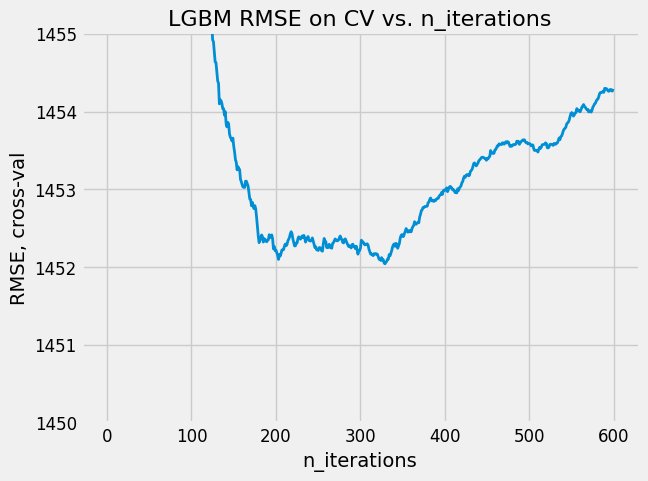

In [106]:
plt.plot(lgb_metrics['rmse-mean'])
plt.ylim((1450, 1455))
plt.title('LGBM RMSE on CV vs. n_iterations')
plt.xlabel('n_iterations')
plt.ylabel('RMSE, cross-val')
plt.show()

Best `n_estimators` parameter range is around [200, 300].

It is also interesting to see which features the model considers to be the most important for predictions.   
Top-5 includes **power, postal_code, age, last_seen, date_crawled**. The "engineered" attribute **age** turned out to be the third most important.

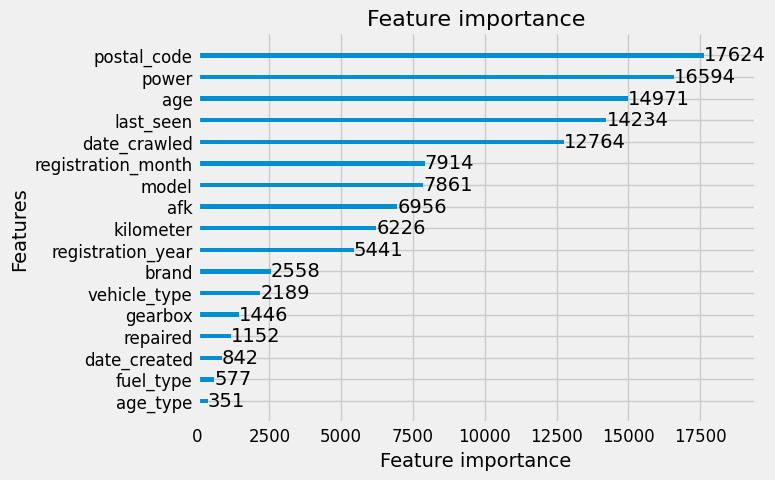

In [107]:
lgb.plot_importance(grid_gbm.best_estimator_)
plt.show()

In [108]:
# adding to comparison
metrics_append('LightGBM', gbm_CV_time, gbm_fit_time, (-grid_gbm.best_score_))

### CatBoost

We add CatBoost to compare it with LightGBM in terms of quality. CatBoost regressor doesn't overfit, so we can use a larger number of iterations.

In [109]:
# set params
cbr_params = {
    'learning_rate': 0.2,
    'max_leaves': 400,
    'thread_count': -1, 
    'loss_function': 'RMSE',  
    'grow_policy': 'Lossguide',
    'verbose': 200,
    'langevin': True,
    'early_stopping_rounds': 50,
    'boosting_type': 'Plain',  # should increase speed
    'per_float_feature_quantization': '14:border_count=1024',  # increase age importance
    'leaf_estimation_iterations': 5  # provides better results on data with small # of features
}

In [110]:
# prepare params and function for cross-val
from catboost import cv
cv_cbr_params = cbr_params.copy()
cv_cbr_params.pop('per_float_feature_quantization')
cv_cbr_params.pop('thread_count')

cv_cbr_params.pop('verbose')
cv_cbr_params['logging_level'] = 'Silent'


@timeit
def cbr_cv() -> pd.core.frame.DataFrame:
    return cv(pool=train, params=cv_cbr_params, plot=True, as_pandas=True)

In [111]:
cbr = CatBoostRegressor(**cbr_params)

In [112]:
train = Pool(X_train_te, y_train)
test = Pool(X_test_te, y_test)

In [113]:
# perform CV
cbr_cv_time, cbr_cv_results = cbr_cv()

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Execution time: 161.00 seconds


In [114]:
# count fit time
cbr_fit_time = model_fit(cbr, train)

0:	learn: 3935.5677453	total: 105ms	remaining: 1m 45s
200:	learn: 1338.1052191	total: 19s	remaining: 1m 15s
400:	learn: 1219.4804306	total: 36.9s	remaining: 55.1s
600:	learn: 1140.4175549	total: 54.9s	remaining: 36.4s
800:	learn: 1082.1560131	total: 1m 12s	remaining: 18s
999:	learn: 1036.3341237	total: 1m 29s	remaining: 0us
Execution time: 90.00 seconds


In [115]:
# best CV RMSE for CatBoost
min(cbr_cv_results['test-RMSE-mean'])

1475.2665030025446

Cross-validation result is a bit worse than that for LightGBM.

Let's take a look at what features are in the CatBoost feature imortance top and compare with LGBM. **power** and **age** are also in top-5. However, unlike LGBM, CatBoost does not consider **last_seen** and even more so **postal_code** to be relevant. At the same time, **age, model, age_type** are relevant.

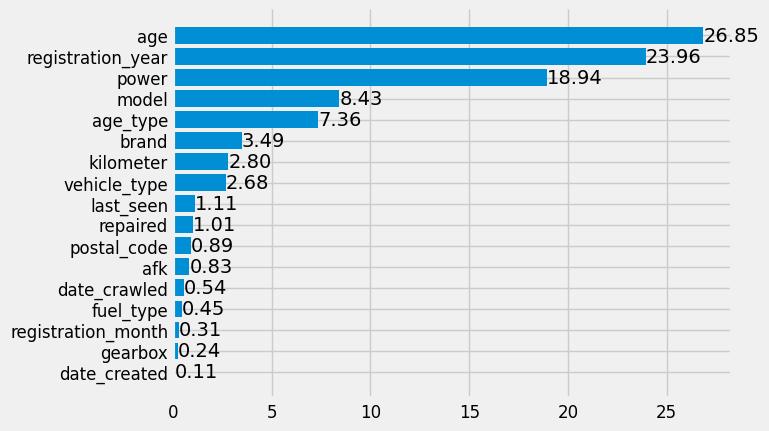

In [116]:
data = pd.Series(cbr.feature_importances_, index=cbr.feature_names_).sort_values()
ax = plt.barh(data.index, data.values)
plt.bar_label(ax, fmt='%.2f')
plt.show()

In [117]:
# adding results to comparison
metrics_append(
    'СatBoost', 
    cbr_cv_time,
    cbr_fit_time,
    min(cbr_cv_results['test-RMSE-mean'])
)

## Model comparison

The comparison of all models:

In [118]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
pd.DataFrame(metrics).T

,Ridge,LightGBM,СatBoost
"CV fit time, seconds",13,31,161
"best model train dataset fit time, seconds",0,10,90
"best CV score (RMSE), euro",2152,1454,1475


The linear model is predictably the fastest (less than 1 second to fit!), but the quality metric (RMSE = 2152) is significantly worse than that of gradient models.
  
Of the gradient models, LightGBM is the fastest (only 8 seconds to train the optimal model). It is also the most accurate model among those considered (RMSE = 1454 on cross-validation).

The result of the best model on the test data:

In [119]:
%%time
gbm_pred = grid_gbm.predict(X_test_oe)

CPU times: total: 8.53 s
Wall time: 1.32 s


In [120]:
print(f'LGBM test score: {(mean_squared_error(y_test, gbm_pred)) ** (1/2):.0f}')

LGBM test score: 1415


Comparing with CatBoost:

In [121]:
%%time
print(f'CatBoost test score: {min(cbr.eval_metrics(data=test, metrics=["RMSE"])["RMSE"]):.0f} \n')

CatBoost test score: 1438 

CPU times: total: 5.75 s
Wall time: 956 ms


On the test sample, LGBM shows RMSE = 1415, which is even better than on cross-validation. It takes the model 6 seconds to make prediction.  
*(Catboost predicts a little faster and provides a slightly worse score)*

**Conclusion:** of the considered models, LightGBM with parameters `max_bin=255, num_iterations=300, num_leaves=400` is the optimal one in terms of speed and metrics. It is relatively fast (6-8 seconds for training and prediction) and provides the highest quality of predictions (RMSE = 1415 on the test set).